<a href="https://colab.research.google.com/github/mpasha7/HSE_ML_Exams_Classification/blob/main/HSE_ML_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Решение задачи классификации на примере опроса о сданных экзаменах и предсказание результатов экзамена

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
### ИМПОРТ ДАННЫХ
df = pd.read_excel('https://drive.google.com/uc?export=download&confirm=no_antivirus&id=187kuIgSJ3IkxkZQvIA_loa7DReWzQ_qM')
df

,Отметка времени,День Вашего рождения (числом),Месяц Вашего рождения (числом),Год Вашего рождения (числом),Ваш пол,"Полное наименование ВУЗа, в котором Вы учились на время сдачи экзамена",Где Вы жили на время сдачи экзамен?,Ваше семейное положение на время сдачи экзамена,Ваш доход на время сдачи экзамена,"По Вашему мнению, каким был предмет?",...,Как Вы посещали пары по этому предмету?,Какой формы был экзамен?,Какой по характеру Ваш преподаватель?,Пол Вашего преподавателя,Приблизительный возраст Вашего преподавателя,"Преподаватель замечал, что Вы списываете?",Как вёл пары преподаватель?,Ходил ли преподаватель во время экзамена?,В каких отношениях Вы были с преподавателем?,Какую оценку Вы получили?
0,2019-03-25 12:32:47.765,1,4,1995,Ж,Пермский национальный исследовательский полите...,В съёмной квартире не один,Есть девушка/молодой человек,Живу на стипендию,"Лёгкий, т.к. очень редко или вообще не приходи...",...,Был почти на всех парах,Устной,По настроению,Ж,Старше 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил","Скорее всего в хороших, чем в плохих",5
1,2019-03-25 12:33:39.453,9,7,1999,Ж,Пермский государственный национальный исследов...,С родителями в квартире,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Да, и выгонял с экзамена",Материал был понятен не весь,"Да, ходил",В нейтральных,2
2,2019-03-25 12:35:11.082,9,7,1999,Ж,Пермский государственный национальный исследов...,С родителями в квартире,Один,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Письменной,Строгий,Ж,С 30 до 50 лет,"Нет, не замечал",Материал был вообще не понятен,"Да, ходил","В плохих, преподаватель постоянно цеплялся ко мне",3
3,2019-03-25 12:36:28.270,5,8,1999,Ж,Пгниу,С родителями в квартире,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Нет, не замечал",Весь материал был понятен,"Нет, не ходил","Скорее всего в хороших, чем в плохих",5
4,2019-03-25 12:36:48.386,17,7,2000,Ж,ПГНИУ,В своей квартире не один,Есть девушка/молодой человек,Живу на стипендию,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Устной,По настроению,М,Старше 50 лет,"Нет, не замечал",Весь материал был понятен,"Нет, не ходил","Скорее всего в хороших, чем в плохих",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,2019-06-17 01:22:28.487,5,5,1996,Ж,ФГБОУ ВО ПГНИУ,С родителями в квартире,Есть девушка/молодой человек,Живу на стипендию,Средней сложности: выполнял все задания в учеб...,...,Был почти на всех парах,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Нет, не замечал",Весь материал был понятен,"Нет, не ходил",В нейтральных,5
478,2019-06-23 19:14:38.660,25,8,1997,М,Пермский национально исследовательский политех...,С родителями в квартире,Один,"Работаю, сам зарабатываю себе на жизнь","Лёгкий, т.к. очень редко или вообще не приходи...",...,Был почти на всех парах,Устной,По настроению,М,С 30 до 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил",В нейтральных,4
479,2020-02-29 10:41:23.964,6,9,1971,Ж,Пермский государственный педагогический институт,В общежитии,Есть девушка/молодой человек,Живу на стипендию,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Устной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Да, и выгонял с экзамена",Весь материал был понятен,"Нет, не ходил","Скорее всего в хороших, чем в плохих",4
480,2020-03-16 13:08:05.916,1,2,1998,Ж,Пермский государственный университет,В съёмной квартире не один,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,По настроению,Ж,С 30 до 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил","Скорее всего в хороших, чем в плохих",4


In [ ]:
df.columns

Index(['Отметка времени', 'День Вашего рождения (числом)',
       'Месяц Вашего рождения (числом)', 'Год Вашего рождения (числом)',
       'Ваш пол',
       'Полное наименование ВУЗа, в котором Вы учились на время сдачи экзамена',
       'Где Вы жили на время сдачи экзамен?',
       'Ваше семейное положение на время сдачи экзамена',
       'Ваш доход на время сдачи экзамена',
       'По Вашему мнению, каким был предмет?',
       'Был ли Вам полезен данный предмет?',
       'Был ли преподаватель увлечён предметом?',
       'Были ли Вы увлечены данным предметом?', 'Готовили ли Вы шпаргалки?',
       'Сами ли Вы готовили шпаргалки?', 'Вы списывали?',
       'За какой период Вы подготовились к экзамену?',
       'Склонны ли Вы к прокрастинации (прокрастина́ция — склонность к постоянному откладыванию какого-либо дела)?',
       'Внимательно ли Вы слушали преподавателя во время лекции?',
       'Было ли несколько удачных опытов в списывании до этого экзамена?',
       'Как Вы посещали пары п

In [ ]:
### ПЕРЕИМЕНОВАНИЕ СТОЛБЦОВ
df.columns = ['Дата', 'День рождения', 'Месяц рождения', 'Год рождения', 'Пол', 'Вуз', 'Жилье', 'Семейное положение', 'Доход', 'Сложность', 'Польза', 'Преподаватель увлечён предметом?',\
              'Вы увлечены предметом?', 'Шпаргалки', 'Свои шпаргалки', 'Списывали?', 'Период подготовки', 'Прокрастинация', 'Внимание на лекции', 'Раньше списывали?', 'Посещаемость',\
              'Форма экзамена', 'Характер преподавателя', 'Пол преподавателя', 'Возраст преподавателя', 'Преподаватель замечал списывание?', 'Понятность материала', 'Преподаватель ходил?',\
              'Отношения с преподавателем', 'Оценка']
df.head(3)

,Дата,День рождения,Месяц рождения,Год рождения,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
0,2019-03-25 12:32:47.765,1,4,1995,Ж,Пермский национальный исследовательский полите...,В съёмной квартире не один,Есть девушка/молодой человек,Живу на стипендию,"Лёгкий, т.к. очень редко или вообще не приходи...",...,Был почти на всех парах,Устной,По настроению,Ж,Старше 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил","Скорее всего в хороших, чем в плохих",5
1,2019-03-25 12:33:39.453,9,7,1999,Ж,Пермский государственный национальный исследов...,С родителями в квартире,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Да, и выгонял с экзамена",Материал был понятен не весь,"Да, ходил",В нейтральных,2
2,2019-03-25 12:35:11.082,9,7,1999,Ж,Пермский государственный национальный исследов...,С родителями в квартире,Один,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Письменной,Строгий,Ж,С 30 до 50 лет,"Нет, не замечал",Материал был вообще не понятен,"Да, ходил","В плохих, преподаватель постоянно цеплялся ко мне",3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 30 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               482 non-null    datetime64[ns]
 1   День рождения                      482 non-null    int64         
 2   Месяц рождения                     482 non-null    int64         
 3   Год рождения                       482 non-null    int64         
 4   Пол                                482 non-null    object        
 5   Вуз                                482 non-null    object        
 6   Жилье                              482 non-null    object        
 7   Семейное положение                 482 non-null    object        
 8   Доход                              482 non-null    object        
 9   Сложность                          482 non-null    object        
 10  Польза                             482

In [ ]:
### ПОДГОТОВКА СТОЛБЦА "ВУЗ"
universities = df['Вуз']
universities.value_counts()

ПГНИУ                                                                  107
Пермский государственный национальный исследовательский университет     33
Пермский Государственный Национальный Исследовательский Университет     20
Пгниу                                                                   18
Самарский университет                                                   18
                                                                      ... 
Пермский государственный научно исследовательский университет            1
Пермский Государственный Научный Исследовательский Университет           1
ФГБОУ ВПО "ПГНИУ"                                                        1
Пермский государственный национальный исследовательский институт         1
Пермский государственный педагогический институт                         1
Name: Вуз, Length: 147, dtype: int64

In [ ]:
def universities_rename(s):
  s = s.replace(r'"', '').replace(r'«', '').replace('(', '').replace('-', ' ')
  words = s.strip().split()
  if len(words) == 1:
    return s.upper()
  else:
    symbols = []
    for i in range(len(words)):
      symbols.append(words[i][0])
    return ''.join(symbols).strip().upper()

In [ ]:
universities = universities.astype(str).apply(universities_rename)
universities.value_counts()

ПГНИУ                222
ГУД                   36
СУ                    30
УД                    27
ПНИПУ                 21
                    ... 
Л1                     1
ФГАОУВОСНИУИАСКСУ      1
СМ                     1
СИАСК                  1
ПГПИ                   1
Name: Вуз, Length: 76, dtype: int64

In [ ]:
### Снятие ограничения на максимальное количество строк
max_rows = pd.get_option('display.max_rows')
pd.set_option('display.max_rows', None)

In [ ]:
universities.value_counts()

ПГНИУ                222
ГУД                   36
СУ                    30
УД                    27
ПНИПУ                 21
ПГНИУ                 16
ПГГПУ                 12
ДУБНА                  8
СНИУИАСК               7
ПГУ                    7
СНИУ                   7
МУПОЧ                  4
ГД                     3
ПНИПУ                  3
РАНХИГСППР             3
СИСК                   3
МУПОИЧД                2
СИК                    2
СНИУИАК                2
СГУ                    2
СПБГУ                  2
ФВП                    2
ГУПОИЧД                2
МД                     2
УФУИППРБНЕ             2
ФВПИАЕАВМР             2
ПНИУ                   2
ПГУ                    2
ПГНИИ                  2
МГ                     1
СИАС                   1
 ПГНИУ                 1
ПИИИК                  1
САК                    1
ПГГП                   1
ФГБУСНИУИСКСУ          1
ФГБОУСНИУИСКСУ         1
НИУИСК                 1
ПГГПУ                  1
СНИУИСПК               1


In [ ]:
### Синонимы ПГНИУ
df['Вуз'][universities.str.contains('ПНИУ')].values

array(['Пермский национальный исследовательский университет ',
       'Пермский Национально Исследовательский Университиет'],
      dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ПГНИИ')].values

array(['Пермский государственный научно исследовательский институт',
       'Пермский государственный национальный исследовательский институт  '],
      dtype=object)

In [ ]:
universities[universities.str.contains('ПГНИУ|ПГУ|ПНИУ|ПГНИИ')] = 'ПГНИУ'

In [ ]:
### Синонимы Самарского НИУ
df['Вуз'][universities.str.contains('СУ')].values

array(['федеральное государственное автономное образовательное учреждение высшего образования «Самарский национальный исследовательский университет имени академика С.П. Королева» (Самарский университет)',
       'Самарский университет', 'Самарский Университет',
       'Самарский университет', 'Самарский университет ',
       'Самарский университет ', 'Самарский университет',
       'Самарский университет ', 'Самарский университет ',
       'Самарский университет',
       'Федельное государственное бюджетное учреждение "Самарский национальный исследовательский университет имени С.П. Королёва (Самарский университет)"',
       'Федеральное государственное бюджетное образовательное учреждение "Самарский национальный исследовательский университет имени С.П. Королёва (Самарский университет)"',
       'Самарский университет', 'Самарский университет',
       'Самарский Университет', 'Самарский университет ',
       'Самарский университет ', 'Самарский университет',
       'Самарский университе

In [ ]:
df['Вуз'][universities.str.contains('НИУИ')].values

array(['Самарский национальный исследовательский университет им. академика Королева',
       'федеральное государственное автономное образовательное учреждение высшего образования «Самарский национальный исследовательский университет имени академика С.П. Королева» (Самарский университет)',
       'Самарский национально-исследовательский университет имени академика С.П. Королева',
       'Самарский национальный исследовательский университет имени академика С.П. Королева',
       'Самарский национальный исследовательский университет им. Королёва',
       'Самарский национальный исследовательский университет имени академика С.П. Королева',
       'Федельное государственное бюджетное учреждение "Самарский национальный исследовательский университет имени С.П. Королёва (Самарский университет)"',
       'Федеральное государственное бюджетное образовательное учреждение "Самарский национальный исследовательский университет имени С.П. Королёва (Самарский университет)"',
       'Национальный Иссл

In [ ]:
df['Вуз'][universities.str.contains('СИСК')].values

array(['Сниу им. С.П. Королева', 'СНИУ им. С.П. Королёва',
       'СНИУ им. С.П. Королева'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('СИК')].values

array(['Сниу им королева', 'СГАУ им. Королева'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('САК')].values

array(['СНИУ ак. Королева '], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('СГУ')].values

array(['Самарский Государственный университет',
       'Самарский государственный университет'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('СИАСК')].values

array(['СНИУ им академика С.П. Королева'], dtype=object)

In [ ]:
universities[universities.str.contains('СУ|CУ|СИ|СГУ|СНИУ|СИСК|СИК|САК|СИАСК|НИУИСК')] = 'СНИУ'

In [ ]:
### Синонимы ГУ "Дубна"
df['Вуз'][universities.str.contains('УД')].values

array(['Государственный университет Дубна', 'Университет Дубна',
       'Университет «Дубна»', 'Государственный университет Дубна ',
       'Университет «Дубна»', 'Государственный университет Дубна', 'ГУД',
       'ГУД', 'Государственный университет Дубна', 'Университет Дубна',
       'Государственный университет «Дубна»',
       'Государственный университет «Дубна»', 'Университет Дубна ',
       'Университет "Дубна"', 'Университет "Дубна"', 'Университет Дубна',
       'Университет Дубна', 'Государственный университет Дубна',
       'Государственный университет «Дубна»',
       'Государственный университет Дубна',
       'Государственный университет Дубна',
       'Государственный университет "Дубна"',
       'Государственный университет Дубна',
       'Государственный университет "Дубна"',
       'Государственный университет "Дубна"', 'Университе " Дубна"',
       'Университет Дубна', 'Университет Дубна ',
       'Государственный университет "Дубна"', 'Университет "Дубна"',
       'ГУ

In [ ]:
df['Вуз'][universities.str.contains('ДУБНА')].values

array(['Дубна', 'Дубна', 'Дубна', 'Дубна', 'Дубна', 'Дубна', 'Дубна',
       'Дубна'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ГД')].values

array(['ГУ Дубна', 'ГУ "Дубна"', 'Гуд Дубна '], dtype=object)

In [ ]:
### МУПОЧ = Международный университет природы, общества и человека "Дубна" (Старое название ГУ "Дубна")
df['Вуз'][universities.str.contains('МУПО')].values

array(['Мупоч',
       'Международный университет природы, общества и человека "Дубна"',
       'Международный университет природы, общества и человека "Дубна"',
       'МУПОЧ', 'МУПОЧ', 'МУПОЧ'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('МД')].values

array(['МУПОЧ Дубна', 'мупоч дубна'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ГУПОИЧД')].values

array(['Государственный университет природы общества и человека "Дубна" ',
       'Государственный университет природы общества и человека "Дубна" '],
      dtype=object)

In [ ]:
universities[universities.str.contains('УД|ДУБНА|ГД|МУПО|МД|ГУПОИЧД')] = 'ГУД'

In [ ]:
### Синонимы ПГГПУ
df['Вуз'][universities.str.contains('ПГГП')].values

array(['Пггпу ', 'Пермский государственный гуманитарно-педагогический',
       'Пггпу', 'ПГГПУ', 'Пггпу',
       'Пермский государственный гуманитарно-педагогический университет',
       'ПГГПУ', 'ПГГПУ',
       'Пермский государственный гуманитарно-педагогический университет ',
       'Пермский Государственный Гуманитарно-педагогический Университет',
       'Пермский государственный гуманитарно-педагогический университет',
       'ПГГПУ', 'ПГГПУ', 'ПГГПУ'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ПГПИ')].values

array(['Пермский государственный педагогический институт'], dtype=object)

In [ ]:
universities[universities.str.contains('ПГГП|ПГПИ')] = 'ПГГПУ'

In [ ]:
### Синонимы ПНИПУ
df['Вуз'][universities.str.contains('ППУ')].values

array(['Пермский политехнический университет', 'Пгппу'], dtype=object)

In [ ]:
universities[(universities.str.contains('ПНИПУ')) | (universities == 'ППУ')] = 'ПНИПУ'

In [ ]:
### Синонимы ПГМУ
df['Вуз'][universities.str.contains('ФВПИАЕАВМР')].values

array(['ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России',
       'ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России'],
      dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ФВП')].values

array(['ФГБОУ ВО ПГМУ им. Академика Е. А. Вагнера', 'ФГБОУ ВПО "ПГНИУ"',
       'ФГБОУ ВО ПГМУ им.ак. Е.А.Вагнера',
       'ФГБОУ ВО ПГМУ им. академика Е.А.Вагнера',
       'ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России',
       'ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России',
       'ФГБОУ ВО ПГНИУ'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ПИЕВ')].values

array(['Пгму им.ак. Е.А. Вагнера'], dtype=object)

In [ ]:
df['Вуз'][universities.str.contains('ПИАЕАВ')].values

array(['ПГМУ им. академика Е. А. Вагнера',
       'ФГБОУ ВО ПГМУ им. Академика Е. А. Вагнера',
       'ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России',
       'ФГБОУ ВО «ПГМУ имени академика Е. А. Вагнера» Минздрава России'],
      dtype=object)

In [ ]:
universities[universities.str.contains('ФВП|ПИЕВ|ПИАЕАВ')] = 'ПГМУ'

In [ ]:
universities.value_counts()

ПГНИУ         254
ГУД            85
СНИУ           64
ПНИПУ          25
ПГГПУ          15
ПГМУ           10
РАНХИГСППР      3
УФУИППРБНЕ      2
СПБГУ           2
Л1              1
НВП             1
КНИТУ           1
ГУ              1
МГ              1
ПИИИК           1
СМ              1
СГАУ            1
НИУВШЭ          1
САМГТУ          1
ФП              1
                1
ПГППУ           1
1               1
УГМР            1
УГМУ            1
ПГНИК           1
АНХИГС          1
СПИВСЭИППФ      1
ВШЭ             1
ПФРИ            1
ПНК             1
Name: Вуз, dtype: int64

In [ ]:
pd.set_option('display.max_rows', max_rows)

In [ ]:
# Вузам, встречающимся менее 10 раз, присвоим значение "Другой"
universities[~universities.str.contains('ПГНИУ|ГУД|СНИУ|ПНИПУ|ПГГПУ|ПГМУ')] = 'Другой'

In [ ]:
universities.value_counts()

ПГНИУ     254
ГУД        85
СНИУ       64
Другой     29
ПНИПУ      25
ПГГПУ      15
ПГМУ       10
Name: Вуз, dtype: int64

In [ ]:
df['Вуз'] = universities
df.head(3)

,Дата,День рождения,Месяц рождения,Год рождения,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
0,2019-03-25 12:32:47.765,1,4,1995,Ж,ПНИПУ,В съёмной квартире не один,Есть девушка/молодой человек,Живу на стипендию,"Лёгкий, т.к. очень редко или вообще не приходи...",...,Был почти на всех парах,Устной,По настроению,Ж,Старше 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил","Скорее всего в хороших, чем в плохих",5
1,2019-03-25 12:33:39.453,9,7,1999,Ж,ПГНИУ,С родителями в квартире,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Да, и выгонял с экзамена",Материал был понятен не весь,"Да, ходил",В нейтральных,2
2,2019-03-25 12:35:11.082,9,7,1999,Ж,ПГНИУ,С родителями в квартире,Один,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Письменной,Строгий,Ж,С 30 до 50 лет,"Нет, не замечал",Материал был вообще не понятен,"Да, ходил","В плохих, преподаватель постоянно цеплялся ко мне",3


In [ ]:
df.columns

Index(['Дата', 'День рождения', 'Месяц рождения', 'Год рождения', 'Пол', 'Вуз',
       'Жилье', 'Семейное положение', 'Доход', 'Сложность', 'Польза',
       'Преподаватель увлечён предметом?', 'Вы увлечены предметом?',
       'Шпаргалки', 'Свои шпаргалки', 'Списывали?', 'Период подготовки',
       'Прокрастинация', 'Внимание на лекции', 'Раньше списывали?',
       'Посещаемость', 'Форма экзамена', 'Характер преподавателя',
       'Пол преподавателя', 'Возраст преподавателя',
       'Преподаватель замечал списывание?', 'Понятность материала',
       'Преподаватель ходил?', 'Отношения с преподавателем', 'Оценка'],
      dtype='object')

In [ ]:
### ПОДГОТОВКА ВРЕМЕННЫХ ДАННЫХ
day = df['День рождения']
month = df['Месяц рождения']
year = df['Год рождения']
day.value_counts()

20      32
28      25
5       23
17      22
9       22
1       20
12      20
25      20
15      19
29      19
18      18
30      16
31      15
27      15
10      15
23      14
14      14
2       14
19      14
8       13
4       12
11      12
21      12
13      12
16      11
3       11
7       10
24       9
26       9
22       6
6        5
1999     2
888      1
Name: День рождения, dtype: int64

In [ ]:
df[(df['День рождения'] == 1999) | (df['День рождения'] == 888)]

,Дата,День рождения,Месяц рождения,Год рождения,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
307,2019-04-01 21:28:20.777,1999,5,24,М,СНИУ,С родителями в квартире,Один,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Устной,По настроению,М,С 30 до 50 лет,"Да, и делал замечания",Весь материал был понятен,"Нет, не ходил","Скорее всего в хороших, чем в плохих",5
417,2019-04-02 19:26:30.204,888,888,8888,М,СНИУ,В общежитии,Есть девушка/молодой человек,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Был почти на всех парах,Письменной,Строгий,М,Старше 50 лет,"Нет, не замечал",Материал был понятен не весь,"Да, ходил",В нейтральных,5
420,2019-04-02 20:12:23.896,1999,9,9,М,ГУД,С родителями в квартире,Один,Живу за счёт родителей,Средней сложности: выполнял все задания в учеб...,...,Ходили на все пары,Письменной,Строгий,М,Старше 50 лет,"Да, и делал замечания",Материал был понятен не весь,"Да, ходил",В нейтральных,3


In [ ]:
day.at[307] = 24
day.at[420] = 9
day.at[417] = int(day.mode())
day[[307, 417, 420]]

307    24
417    20
420     9
Name: День рождения, dtype: int64

In [ ]:
year.at[307] = 1999
year.at[420] = 1999
year.at[417] = int(year.mode())
year[[307, 417, 420]]

307    1999
417    1999
420    1999
Name: Год рождения, dtype: int64

In [ ]:
month.at[417] = int(month.mode())
month[417]

8

In [ ]:
month.value_counts()

8     55
10    52
4     47
12    43
5     42
6     42
1     40
9     40
2     34
3     30
7     29
11    28
Name: Месяц рождения, dtype: int64

In [ ]:
year = df['Год рождения']
year.value_counts()

1999    111
2000     95
1998     82
1996     62
1997     57
1995     27
1994     12
2001      9
99        4
1989      3
1986      3
98        3
97        3
96        2
1993      2
1985      1
1991      1
69        1
200       1
1988      1
1896      1
1971      1
Name: Год рождения, dtype: int64

In [ ]:
def year_normalize(y):
  return y + 1900 if y < 100 else y * 10 if y == 200 else y + 90 if y // 100 == 18 else y

year = year.apply(year_normalize)
year.value_counts()

1999    115
2000     96
1998     85
1996     64
1997     60
1995     27
1994     12
2001      9
1986      4
1989      3
1993      2
1991      1
1985      1
1969      1
1988      1
1971      1
Name: Год рождения, dtype: int64

In [ ]:
### При попытке создать Series с датами и перевести его в тип данных datetime происходит ошибка
birthdate = (year.astype(str) + '-' + month.astype(str) + '-' + day.astype(str)).astype('datetime64[ns]')
birthdate

ParserError: day is out of range for month: 2000-2-30 present at position 460

In [ ]:
df.loc[[460]]

,Дата,День рождения,Месяц рождения,Год рождения,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
460,2019-04-04 23:46:46.317,30,2,2000,Ж,ПНИПУ,С родителями в квартире,Есть девушка/молодой человек,Живу за счёт родителей,"Сложный, т.к. приходилось уделять много времен...",...,Ходили на все пары,Устной,Добрый и отзывчивый,Ж,До 30 лет,"Да, и делал замечания",Весь материал был понятен,"Нет, не ходил","Скорее всего в хороших, чем в плохих",4


In [ ]:
day.at[460] = 29

In [ ]:
birthdate = (year.astype(str) + '-' + month.astype(str) + '-' + day.astype(str)).astype('datetime64[ns]')
birthdate

0     1995-04-01
1     1999-07-09
2     1999-07-09
3     1999-08-05
4     2000-07-17
         ...    
477   1996-05-05
478   1997-08-25
479   1971-09-06
480   1998-02-01
481   1986-11-25
Length: 482, dtype: datetime64[ns]

In [ ]:
type(birthdate[11])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
age = df['Дата'] - birthdate
age

0      8759 days 12:32:47.765000
1      7199 days 12:33:39.453000
2      7199 days 12:35:11.082000
3      7172 days 12:36:28.270000
4      6825 days 12:36:48.386000
                 ...            
477    8443 days 01:22:28.487000
478    7972 days 19:14:38.660000
479   17708 days 10:41:23.964000
480    8079 days 13:08:05.916000
481   12173 days 20:40:44.458000
Length: 482, dtype: timedelta64[ns]

In [ ]:
type(age[0])

pandas._libs.tslibs.timedeltas.Timedelta

In [ ]:
### Добавляем колонку "Возраст" в целочисленном формате
df.insert(4, 'Возраст', age.astype(int))
df.head(3)

,Дата,День рождения,Месяц рождения,Год рождения,Возраст,Пол,Вуз,Жилье,Семейное положение,Доход,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
0,2019-03-25 12:32:47.765,1,4,1995,756822767765000000,Ж,ПНИПУ,В съёмной квартире не один,Есть девушка/молодой человек,Живу на стипендию,...,Был почти на всех парах,Устной,По настроению,Ж,Старше 50 лет,"Нет, не замечал",Весь материал был понятен,"Да, ходил","Скорее всего в хороших, чем в плохих",5
1,2019-03-25 12:33:39.453,9,7,1999,622038819453000000,Ж,ПГНИУ,С родителями в квартире,Один,Живу за счёт родителей,...,Ходили на все пары,Письменной,Добрый и отзывчивый,Ж,С 30 до 50 лет,"Да, и выгонял с экзамена",Материал был понятен не весь,"Да, ходил",В нейтральных,2
2,2019-03-25 12:35:11.082,9,7,1999,622038911082000000,Ж,ПГНИУ,С родителями в квартире,Один,Живу за счёт родителей,...,Был почти на всех парах,Письменной,Строгий,Ж,С 30 до 50 лет,"Нет, не замечал",Материал был вообще не понятен,"Да, ходил","В плохих, преподаватель постоянно цеплялся ко мне",3


In [ ]:
### ЗАМЕНА КАТЕГОРИАЛЬНЫХ ДАННЫХ ЦЕЛОЧИСЛЕННЫМИ
### После каждого изменения колонки она проверялась с помощью value_counts()
df['Пол'] = df['Пол'].replace({'Ж': 0, 'М': 1})

df['Вуз'] = df['Вуз'].replace({
    'ПГНИУ': 0,
    'ГУД': 1,
    'СНИУ': 2,
    'ПНИПУ': 3,
    'ПГГПУ': 4,
    'ПГМУ': 5,
    'Другой': 6})

df['Жилье'] = df['Жилье'].replace({
    'В общежитии': 0,
    'В съёмной квартире не один': 1,
    'В съёмной квартире один': 2,
    'С родителями в квартире': 3,
    'В своей квартире не один': 4,
    'В своей квартире один': 5})

df['Семейное положение'] = df['Семейное положение'].replace({
    'Один': 0,
    'Есть девушка/молодой человек': 1,
    'Женат/замужем': 2})

df['Доход'] = df['Доход'].replace({
    'Живу на стипендию': 0,
    'Живу за счёт родителей': 1,
    'Работаю, сам зарабатываю себе на жизнь': 2,
    'Работаю и получаю степендию': 3})

df['Сложность'] = df['Сложность'].replace({
    'Лёгкий, т.к. очень редко или вообще не приходилось делать задания': 0,
    'Средней сложности: выполнял все задания в учебный период без особых трудностей': 1,
    'Сложный, т.к. приходилось уделять много времени данному предмету в учебный период': 2})

In [ ]:
df['Польза'] = df['Польза'].replace({
    'Не был полезен': 0,
    'Был полезен': 1})

df['Преподаватель увлечён предметом?'] = df['Преподаватель увлечён предметом?'].replace({
    'Нет, не был увлечён': 0,
    'Да, был увлечён': 1})

df['Вы увлечены предметом?'] = df['Вы увлечены предметом?'].replace({
    'Нет, не был увлечён': 0,
    'Да, был увлечён': 1})

df['Шпаргалки'] = df['Шпаргалки'].replace({
    'Нет, не готовил': 0,
    'Да, готовил': 1})

df['Свои шпаргалки'] = df['Свои шпаргалки'].replace({
    'Не готовил': 0,
    'Нет, не сам готовил': 1,
    'Да, сам готовил': 2})

df['Списывали?'] = df['Списывали?'].replace({
    'Нет': 0,
    'Да': 1})

df['Период подготовки'] = df['Период подготовки'].replace({
    'Меньше, чем 1 неделя': 0,
    'От 1 до 2 недель': 1,
    'Больше 2 недель': 2})

df['Прокрастинация'] = df['Прокрастинация'].replace({
    'Нет': 0,
    'Да': 1})

In [ ]:
df['Внимание на лекции'] = df['Внимание на лекции'].replace({
    '«В одно ухо влетало, в другое вылетало»': 0,
    'Когда как': 1,
    'Да, конспектировал всё, что он говорит': 2})

df['Раньше списывали?'] = df['Раньше списывали?'].replace({
    'Нет, не были': 0,
    'Да, были': 1})

df['Посещаемость'] = df['Посещаемость'].replace({
    'Очень часто прогуливал': 0,
    'Был почти на всех парах': 1,
    'Ходили на все пары': 2})

df['Форма экзамена'] = df['Форма экзамена'].replace({
    'Письменной': 0,
    'Устной': 1})

df['Характер преподавателя'] = df['Характер преподавателя'].replace({
    'Строгий': 0,
    'По настроению': 1,
    'Добрый и отзывчивый': 2})

df['Пол преподавателя'] = df['Пол преподавателя'].replace({
    'Ж': 0,
    'М': 1})

df['Возраст преподавателя'] = df['Возраст преподавателя'].replace({
    'До 30 лет': 0,
    'С 30 до 50 лет': 1,
    'Старше 50 лет': 2})

In [ ]:
df['Преподаватель замечал списывание?'] = df['Преподаватель замечал списывание?'].replace({
    'Нет, не замечал': 0,
    'Да, и позволял это делать': 1,
    'Да, и делал замечания': 2,
    'Да, и выгонял с экзамена': 3})

df['Понятность материала'] = df['Понятность материала'].replace({
    'Материал был вообще не понятен': 0,
    'Материал был понятен не весь': 1,
    'Весь материал был понятен': 2})

df['Преподаватель ходил?'] = df['Преподаватель ходил?'].replace({
    'Нет, не ходил': 0,
    'Да, ходил': 1})

df['Отношения с преподавателем'] = df['Отношения с преподавателем'].replace({
    'В плохих, преподаватель постоянно цеплялся ко мне': 0,
    'Скорее всего в плохих, чем в хороших': 1,
    'В нейтральных': 2,
    'Скорее всего в хороших, чем в плохих': 3,
    'В очень хороших отношениях': 4})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Дата                               482 non-null    datetime64[ns]
 1   День рождения                      482 non-null    int64         
 2   Месяц рождения                     482 non-null    int64         
 3   Год рождения                       482 non-null    int64         
 4   Возраст                            482 non-null    int64         
 5   Пол                                482 non-null    int64         
 6   Вуз                                482 non-null    int64         
 7   Жилье                              482 non-null    int64         
 8   Семейное положение                 482 non-null    int64         
 9   Доход                              482 non-null    int64         
 10  Сложность                          482

In [ ]:
y_col = df.columns[-1]              ### Колонка Целевого признака
df[y_col].value_counts()

5    189
4    176
3     90
2     27
Name: Оценка, dtype: int64

In [ ]:
X_cols = df.columns[1:-1]           ### Колонки Факторных признаков
X_cols

Index(['День рождения', 'Месяц рождения', 'Год рождения', 'Возраст', 'Пол',
       'Вуз', 'Жилье', 'Семейное положение', 'Доход', 'Сложность', 'Польза',
       'Преподаватель увлечён предметом?', 'Вы увлечены предметом?',
       'Шпаргалки', 'Свои шпаргалки', 'Списывали?', 'Период подготовки',
       'Прокрастинация', 'Внимание на лекции', 'Раньше списывали?',
       'Посещаемость', 'Форма экзамена', 'Характер преподавателя',
       'Пол преподавателя', 'Возраст преподавателя',
       'Преподаватель замечал списывание?', 'Понятность материала',
       'Преподаватель ходил?', 'Отношения с преподавателем'],
      dtype='object')

In [ ]:
### НОРМАЛИЗАЦИЯ ФАКТОРНЫХ ПРИЗНАКОВ
from sklearn.preprocessing import MinMaxScaler

df_norm = df[X_cols].copy()
df_norm[X_cols] = MinMaxScaler().fit_transform(df[X_cols])
df_norm[y_col] = df[y_col]
df_norm.head(3)

,День рождения,Месяц рождения,Год рождения,Возраст,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Посещаемость,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка
0,0.000000,0.272727,0.996894,0.192129,0.0,0.5,0.2,0.5,0.000000,0.0,...,0.5,1.0,0.5,0.0,1.0,0.0,1.0,1.0,0.75,5
1,0.266667,0.545455,0.998965,0.055688,0.0,0.0,0.6,0.0,0.333333,0.5,...,1.0,0.0,1.0,0.0,0.5,1.0,0.5,1.0,0.50,2
2,0.266667,0.545455,0.998965,0.055688,0.0,0.0,0.6,0.0,0.333333,1.0,...,0.5,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,3


In [ ]:
### Разобьем выборку на обучающую и тестовую, сохраним индексы
random_index = df_norm.sample(n=len(df_norm)).index
train_index = random_index[:int(len(df_norm) * 0.8)]
test_index = random_index[int(len(df_norm) * 0.8):]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier               ### kNN
from sklearn.linear_model import LogisticRegression              ### Логистическая регрессия
from sklearn.naive_bayes import GaussianNB                       ### Наивный Байес
from sklearn.svm import LinearSVC                                ### Машины опорных векторов
from sklearn.tree import DecisionTreeClassifier, plot_tree       ### Дерево решений
from sklearn.ensemble import RandomForestClassifier              ### Лес решений

In [ ]:
### ОБУЧЕНИЕ МОДЕЛЕЙ С РАЗЛИЧНЫМИ МЕТОДАМИ КЛАССИФИКАЦИИ

models_dict = {}
### kNN, (k = 3)
models_dict["kNN"] = KNeighborsClassifier(n_neighbors=3).fit(X=df_norm.loc[train_index, X_cols],
                                                             y=df_norm.loc[train_index, y_col])
models_dict["kNN"] = {"model": models_dict["kNN"],
                      "pred": models_dict["kNN"].predict(df_norm.loc[test_index, X_cols])}

### Логистическая регрессия
models_dict["Logit"] = LogisticRegression().fit(X=df_norm.loc[train_index, X_cols],
                                                             y=df_norm.loc[train_index, y_col])
models_dict["Logit"] = {"model": models_dict["Logit"],
                      "pred": models_dict["Logit"].predict(df_norm.loc[test_index, X_cols])}

### Наивный Байес
models_dict["bayes"] = GaussianNB().fit(X=df_norm.loc[train_index, X_cols],
                                        y=df_norm.loc[train_index, y_col])
models_dict["bayes"] = {"model": models_dict["bayes"],
                        "pred": models_dict["bayes"].predict(df_norm.loc[test_index, X_cols])}

### Машины опорных векторов (линейное ядро)
models_dict["SVC"] = LinearSVC().fit(X=df_norm.loc[train_index, X_cols],
                                     y=df_norm.loc[train_index, y_col])
models_dict["SVC"] = {"model": models_dict["SVC"],
                      "pred": models_dict["SVC"].predict(df_norm.loc[test_index, X_cols])}

### Дерево решений (без гиперпараметров)
models_dict["tree"] = DecisionTreeClassifier().fit(X=df_norm.loc[train_index, X_cols],
                                                   y=df_norm.loc[train_index, y_col])
models_dict["tree"] = {"model": models_dict["tree"],
                       "pred": models_dict["tree"].predict(df_norm.loc[test_index, X_cols])}

### Случайный лес (150 элементов ансамбля)
models_dict["RF"] = RandomForestClassifier(n_estimators=150).fit(X=df_norm.loc[train_index, X_cols],
                                                                 y=df_norm.loc[train_index, y_col])
models_dict["RF"] = {"model": models_dict["RF"],
                     "pred": models_dict["RF"].predict(df_norm.loc[test_index, X_cols])}

models_dict

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'kNN': {'model': KNeighborsClassifier(n_neighbors=3),
  'pred': array([2, 4, 5, 5, 5, 3, 3, 4, 3, 5, 4, 4, 5, 5, 4, 5, 4, 5, 3, 4, 3, 3,
         4, 5, 5, 4, 3, 5, 3, 3, 3, 5, 5, 4, 5, 3, 5, 3, 3, 5, 3, 4, 5, 2,
         4, 4, 5, 3, 5, 4, 4, 5, 5, 4, 3, 5, 4, 3, 3, 4, 4, 5, 4, 3, 5, 3,
         5, 4, 3, 5, 3, 2, 3, 3, 3, 3, 4, 5, 5, 5, 4, 5, 5, 2, 3, 2, 4, 3,
         5, 3, 4, 5, 3, 4, 5, 3, 5])},
 'Logit': {'model': LogisticRegression(),
  'pred': array([5, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 4, 5, 5, 4, 5, 4, 5, 4, 4, 4, 5,
         5, 5, 4, 4, 3, 5, 4, 5, 4, 4, 3, 4, 5, 5, 3, 5, 4, 5, 4, 4, 5, 4,
         4, 4, 5, 2, 5, 4, 4, 5, 5, 5, 4, 4, 5, 5, 3, 4, 3, 4, 4, 5, 4, 3,
         5, 5, 4, 4, 3, 5, 3, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 4,
         4, 4, 4, 5, 3, 4, 5, 4, 5])},
 'bayes': {'model': GaussianNB(),
  'pred': array([5, 4, 5, 5, 5, 2, 4, 2, 5, 5, 4, 4, 5, 2, 4, 5, 2, 5, 4, 4, 2, 5,
         4, 5, 2, 4, 2, 5, 5, 2, 4, 4, 2, 2, 5, 5, 2, 2, 4, 5, 2, 2, 5, 2,
         4, 4, 4,

In [ ]:
### ВИЗУАЛИЗАЦИЯ И ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

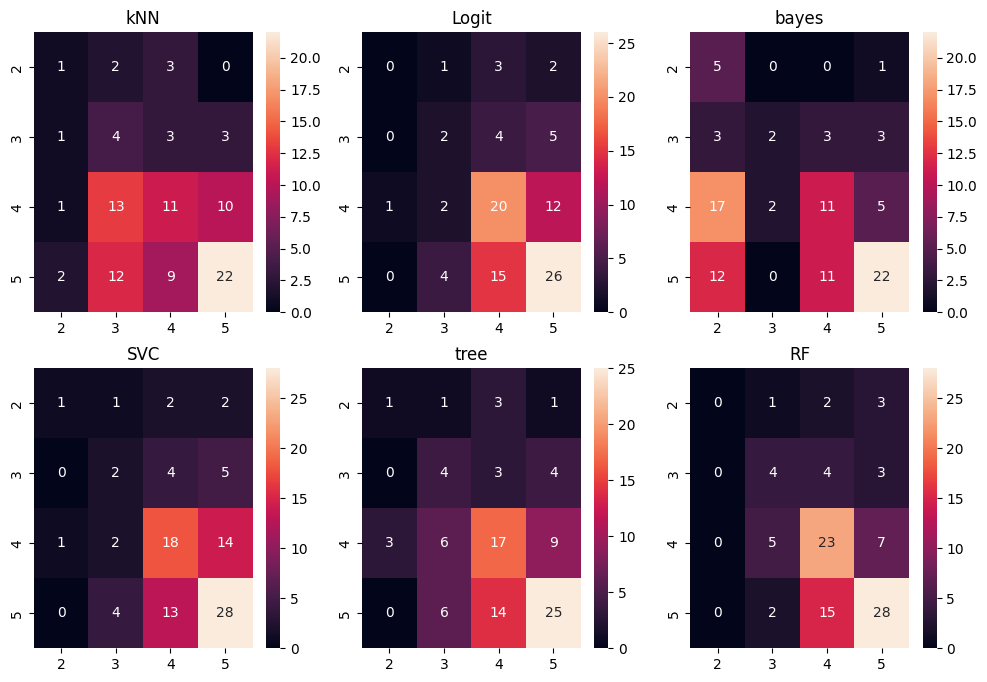

In [ ]:
### Построим матрицы ошибок (тепловые карты)
plt.rcParams["figure.figsize"] = 12, 8

i = 1
for mname, mvalue in models_dict.items():
  plt.subplot(2, 3, i)
  sns.heatmap(metrics.confusion_matrix(df_norm.loc[test_index, y_col], mvalue["pred"]),
              xticklabels=[2, 3, 4, 5], yticklabels=[2, 3, 4, 5], annot=True, fmt=".0f")
  plt.title(mname)
  i += 1

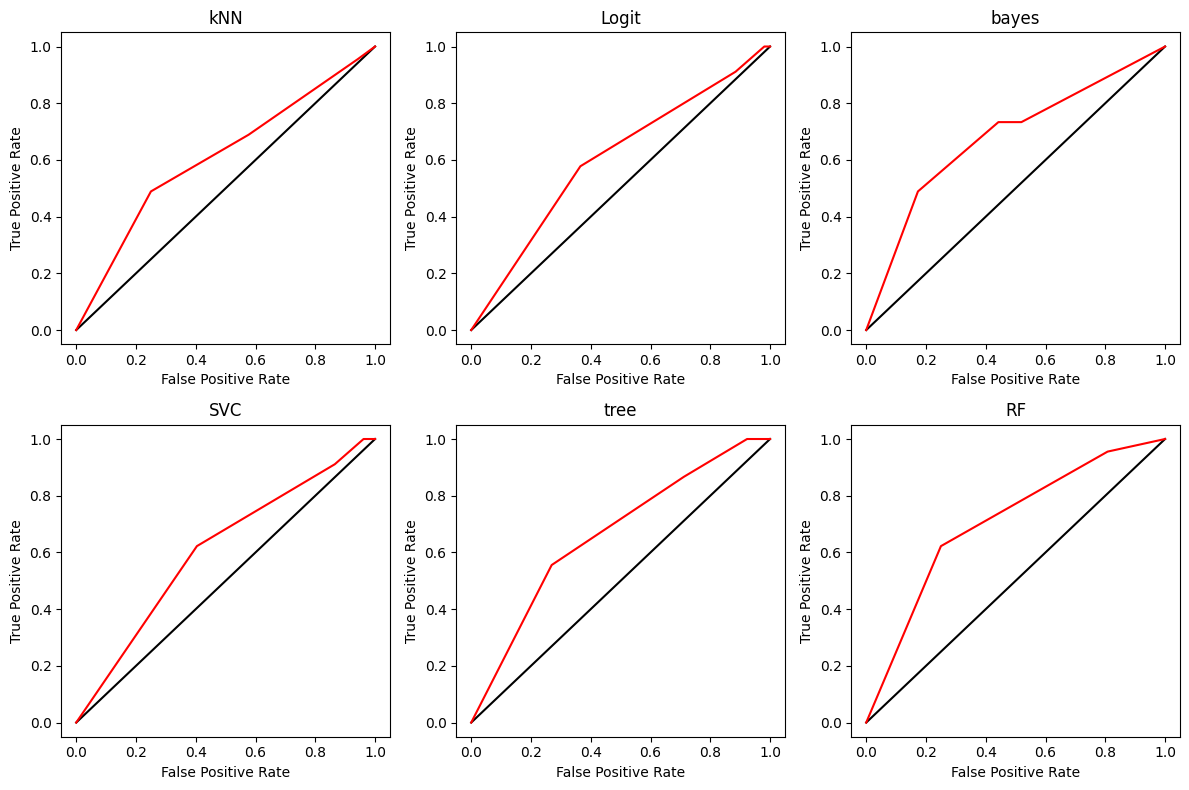

In [ ]:
### Построим ROC-кривые
i = 1
for mname, mvalue in models_dict.items():
  plt.subplot(2, 3, i)
  fpr, tpr, tresholds = metrics.roc_curve(df_norm.loc[test_index, y_col],
                                          mvalue["pred"],
                                          pos_label=5)
  plt.plot([0, 1], [0, 1], color="black")
  plt.plot(fpr, tpr, color="red")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title(mname)
  i += 1

plt.tight_layout();

In [ ]:
### Выведем значения F-меры
i = 1
for mname, mvalue in models_dict.items():
  print(f"F-мера ({mname})\t= {metrics.f1_score(df_norm.loc[test_index, y_col], mvalue['pred'], average='micro'):.5f}")
  i += 1

F-мера (kNN)	= 0.39175
F-мера (Logit)	= 0.49485
F-мера (bayes)	= 0.41237
F-мера (SVC)	= 0.50515
F-мера (tree)	= 0.48454
F-мера (RF)	= 0.56701


In [ ]:
### БАЛАНСИРОВКА ВЫБОРКИ
df_norm[y_col].value_counts()

5    189
4    176
3     90
2     27
Name: Оценка, dtype: int64

In [ ]:
### Т.к. 2-ек слишком мало, объединим их в один класс с 3-ками
df_norm[y_col][df_norm[y_col] == 2] = 3
df_norm[y_col].value_counts()

<ipython-input-76-c4bc7b5f8fb0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[y_col][df_norm[y_col] == 2] = 3


5    189
4    176
3    117
Name: Оценка, dtype: int64

In [ ]:
### OVERSAMPLING (добавление новых объектов)
fives_count = df_norm[y_col].value_counts().iloc[0]
fours_count = df_norm[y_col].value_counts().iloc[1]
threes_count = df_norm[y_col].value_counts().iloc[2]
new_fours = df_norm[df_norm[y_col] == 4].sample(n=(fives_count-fours_count))      ### Новые 4-ки
new_threes = df_norm[df_norm[y_col] == 3].sample(n=(fives_count-threes_count))    ### Новые 3-ки

df_balans = pd.concat([df_norm, new_fours, new_threes], ignore_index=True)
df_balans[y_col].value_counts()

5    189
3    189
4    189
Name: Оценка, dtype: int64

In [ ]:
### Разобьем выборку на обучающую и тестовую, сохраним индексы
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
### ОБУЧЕНИЕ МОДЕЛЕЙ НА СБАЛАНСИРОВАННОЙ ВЫБОРКЕ

models_dict = {}
### kNN, (k = 3)
models_dict["kNN"] = KNeighborsClassifier(n_neighbors=3).fit(X=df_balans.loc[train_index, X_cols],
                                                             y=df_balans.loc[train_index, y_col])
models_dict["kNN"] = {"model": models_dict["kNN"],
                      "pred": models_dict["kNN"].predict(df_balans.loc[test_index, X_cols])}

### Логистическая регрессия
models_dict["Logit"] = LogisticRegression().fit(X=df_balans.loc[train_index, X_cols],
                                                             y=df_balans.loc[train_index, y_col])
models_dict["Logit"] = {"model": models_dict["Logit"],
                      "pred": models_dict["Logit"].predict(df_balans.loc[test_index, X_cols])}

### Наивный Байес
models_dict["bayes"] = GaussianNB().fit(X=df_balans.loc[train_index, X_cols],
                                        y=df_balans.loc[train_index, y_col])
models_dict["bayes"] = {"model": models_dict["bayes"],
                        "pred": models_dict["bayes"].predict(df_balans.loc[test_index, X_cols])}

### Машины опорных векторов (линейное ядро)
models_dict["SVC"] = LinearSVC().fit(X=df_balans.loc[train_index, X_cols],
                                     y=df_balans.loc[train_index, y_col])
models_dict["SVC"] = {"model": models_dict["SVC"],
                      "pred": models_dict["SVC"].predict(df_balans.loc[test_index, X_cols])}

### Дерево решений (без гиперпараметров)
models_dict["tree"] = DecisionTreeClassifier().fit(X=df_balans.loc[train_index, X_cols],
                                                   y=df_balans.loc[train_index, y_col])
models_dict["tree"] = {"model": models_dict["tree"],
                       "pred": models_dict["tree"].predict(df_balans.loc[test_index, X_cols])}

### Случайный лес (150 элементов ансамбля)
models_dict["RF"] = RandomForestClassifier(n_estimators=150).fit(X=df_balans.loc[train_index, X_cols],
                                                                 y=df_balans.loc[train_index, y_col])
models_dict["RF"] = {"model": models_dict["RF"],
                     "pred": models_dict["RF"].predict(df_balans.loc[test_index, X_cols])}

models_dict

{'kNN': {'model': KNeighborsClassifier(n_neighbors=3),
  'pred': array([3, 3, 5, 3, 4, 3, 5, 4, 4, 5, 4, 3, 3, 5, 5, 4, 4, 3, 4, 5, 4, 3,
         4, 4, 3, 4, 3, 3, 3, 3, 3, 4, 5, 3, 4, 5, 3, 4, 4, 4, 4, 5, 5, 5,
         5, 5, 5, 3, 3, 5, 4, 4, 5, 3, 5, 5, 3, 5, 5, 5, 3, 3, 4, 5, 3, 4,
         4, 3, 3, 4, 5, 3, 5, 3, 4, 4, 4, 4, 3, 3, 5, 5, 4, 4, 4, 4, 3, 3,
         4, 3, 5, 3, 5, 3, 4, 5, 3, 3, 3, 3, 3, 4, 5, 4, 4, 4, 5, 4, 4, 3,
         4, 5, 3, 4])},
 'Logit': {'model': LogisticRegression(),
  'pred': array([3, 5, 4, 5, 5, 5, 5, 5, 3, 3, 3, 4, 4, 3, 4, 3, 4, 3, 4, 4, 5, 4,
         4, 5, 4, 4, 3, 3, 3, 4, 3, 4, 5, 5, 4, 5, 4, 3, 4, 4, 4, 5, 5, 5,
         5, 5, 4, 4, 4, 5, 3, 3, 5, 5, 4, 5, 3, 5, 5, 3, 4, 5, 4, 5, 4, 3,
         4, 3, 4, 3, 5, 5, 5, 5, 4, 3, 4, 3, 4, 3, 3, 5, 5, 4, 3, 4, 5, 3,
         3, 3, 5, 5, 5, 4, 4, 5, 3, 4, 4, 4, 3, 5, 3, 3, 5, 5, 5, 4, 3, 3,
         5, 5, 3, 3])},
 'bayes': {'model': GaussianNB(),
  'pred': array([4, 5, 4, 5, 5, 4, 5, 5, 4, 3, 3, 5, 3,

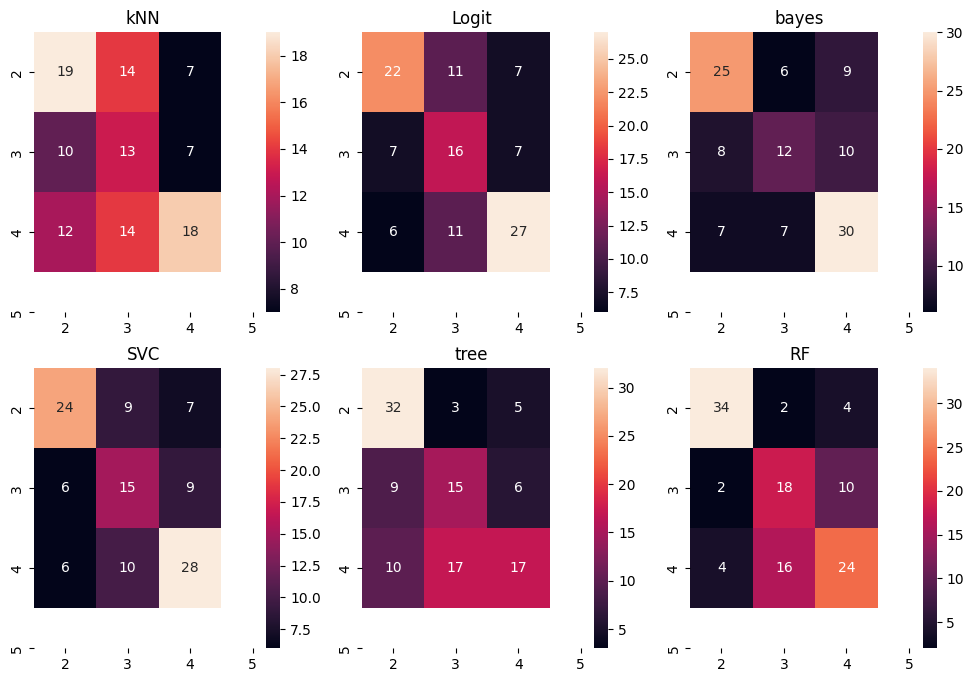

In [ ]:
### ОЦЕНКА КАЧЕСТВА МОДЕЛЕЙ НА СБАЛАНСИРОВАННОЙ ВЫБОРКЕ
### Построим матрицы ошибок (тепловые карты)
i = 1
for mname, mvalue in models_dict.items():
  plt.subplot(2, 3, i)
  sns.heatmap(metrics.confusion_matrix(df_balans.loc[test_index, y_col], mvalue["pred"]),
              xticklabels=[2, 3, 4, 5], yticklabels=[2, 3, 4, 5], annot=True, fmt=".0f")
  plt.title(mname)
  i += 1

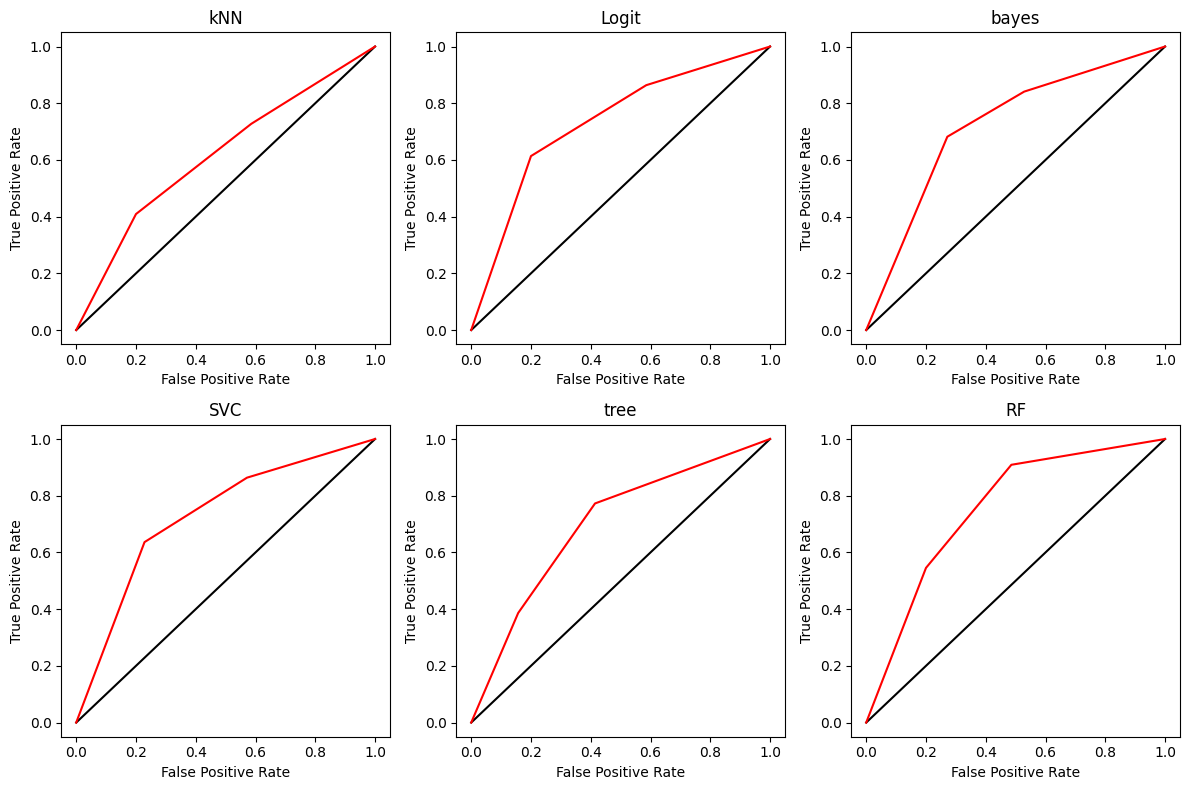

In [ ]:
### Построим ROC-кривые
i = 1
for mname, mvalue in models_dict.items():
  plt.subplot(2, 3, i)
  fpr, tpr, tresholds = metrics.roc_curve(df_balans.loc[test_index, y_col],
                                          mvalue["pred"],
                                          pos_label=5)
  plt.plot([0, 1], [0, 1], color="black")
  plt.plot(fpr, tpr, color="red")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title(mname)
  i += 1

plt.tight_layout();

In [ ]:
### Выведем значения F-меры
i = 1
for mname, mvalue in models_dict.items():
  print(f"F-мера ({mname})\t= {metrics.f1_score(df_balans.loc[test_index, y_col], mvalue['pred'], average='micro'):.5f}")
  i += 1

F-мера (kNN)	= 0.43860
F-мера (Logit)	= 0.57018
F-мера (bayes)	= 0.58772
F-мера (SVC)	= 0.58772
F-мера (tree)	= 0.56140
F-мера (RF)	= 0.66667


In [ ]:
### ПОДБОР ГИПЕРПАРАМЕТРА k АЛГОРИТМА kNN С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
from sklearn.model_selection import cross_validate

f_measures_kNN = []
K = 10                    ### Количество блоков
for k in range(3, 21, 2):
  cv_results = cross_validate(KNeighborsClassifier(n_neighbors=k),
                              X=df_balans.loc[train_index, X_cols], y=df_balans.loc[train_index, y_col],
                              cv=K, scoring=("f1_weighted"))
  f_measures_kNN.append((k, cv_results["test_score"].mean()))

sorted(f_measures_kNN, key = lambda x: -x[1])

[(3, 0.4676199782978932),
 (7, 0.4301027277863806),
 (9, 0.42947090986126313),
 (19, 0.41809540407584),
 (17, 0.4127530111330128),
 (15, 0.40687561379842807),
 (5, 0.40439758179567553),
 (13, 0.398184118212768),
 (11, 0.3948104254550342)]

In [ ]:
k_best = max(f_measures_kNN, key = lambda x: x[1])[0]
k_best

3

In [ ]:
### Обучим kNN с оптимальным k
model_kNN = KNeighborsClassifier(n_neighbors=k_best).fit(X=df_balans.loc[train_index, X_cols],
                                                         y=df_balans.loc[train_index, y_col])

model_kNN_pred = model_kNN.predict(df_balans.loc[test_index, X_cols])
print(f"F-мера (kNN, k={k_best}) = {metrics.f1_score(df_balans.loc[test_index, y_col], model_kNN_pred, average='weighted')}")

F-мера (kNN, k=3) = 0.3946301686886402


In [ ]:
### ПОДБОР ГИПЕРПАРАМЕТРА max_depth ДЛЯ ДЕРЕВА РЕШЕНИЙ С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
f_measures_tree = []
K = 10                    ### Количество блоков
for d in range(3, 10):
  cv_results = cross_validate(DecisionTreeClassifier(max_depth=d),
                              X=df_balans.loc[train_index, X_cols], y=df_balans.loc[train_index, y_col],
                              cv=K, scoring=("f1_weighted"))
  f_measures_tree.append((d, cv_results["test_score"].mean()))

sorted(f_measures_tree, key = lambda x: -x[1])

[(8, 0.5597181659897559),
 (9, 0.545435079240534),
 (7, 0.5066529116595868),
 (6, 0.5058066910228725),
 (5, 0.49706363716231367),
 (3, 0.48786898997162653),
 (4, 0.4625975579895808)]

In [ ]:
depth_best = max(f_measures_tree, key = lambda x: x[1])[0]
depth_best

8

In [ ]:
### Обучим дерево решений с оптимальной высотой
model_tree = DecisionTreeClassifier(max_depth=depth_best).fit(X=df_balans.loc[train_index, X_cols],
                                                              y=df_balans.loc[train_index, y_col])
model_tree_pred = model_tree.predict(df_balans.loc[test_index, X_cols])
print(f"F-мера (tree, max_depth={depth_best}) = {metrics.f1_score(df_balans.loc[test_index, y_col], model_tree_pred, average='micro')}")

F-мера (tree, max_depth=8) = 0.5087719298245614


In [ ]:
### ПОДБОР ГИПЕРПАРАМЕТРА n_estimators ДЛЯ СЛУЧАЙНОГО ЛЕСА С ПОМОЩЬЮ КРОСС-ВАЛИДАЦИИ
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
f_measures_forest = []
K = 10                    ### Количество блоков
for n in range(200, 401, 50):
  cv_results = cross_validate(RandomForestClassifier(n_estimators=n),
                              X=df_balans.loc[train_index, X_cols], y=df_balans.loc[train_index, y_col],
                              cv=K, scoring=("f1_weighted"))
  f_measures_forest.append((n, cv_results["test_score"].mean()))

sorted(f_measures_forest, key = lambda x: -x[1])

[(400, 0.6330349500030795),
 (350, 0.6322777219174367),
 (250, 0.6299950502017804),
 (200, 0.6266402572042098),
 (300, 0.6190483547308907)]

In [ ]:
n_best = max(f_measures_forest, key = lambda x: x[1])[0]
n_best

400

In [ ]:
### Обучим случайный лес с оптимальным количеством элементов ансамбля
model_forest = DecisionTreeClassifier(max_depth=n_best).fit(X=df_balans.loc[train_index, X_cols],
                                                            y=df_balans.loc[train_index, y_col])
model_forest_pred = model_forest.predict(df_balans.loc[test_index, X_cols])
print(f"F-мера (tree, max_depth={n_best}) = {metrics.f1_score(df_balans.loc[test_index, y_col], model_forest_pred, average='micro')}")

F-мера (tree, max_depth=400) = 0.5701754385964912


In [ ]:
### ОТБОР ФАКТОРНЫХ ПРИЗНАКОВ ПО НЕОПРЕДЕЛЕННОСТИ ДЖИНИ (с помощью дерева решений)
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
### Обучим дерево решений с гиперпараметром (criterion='gini')
tree = DecisionTreeClassifier(criterion='gini').fit(X=df_balans.loc[train_index, X_cols],
                                                    y=df_balans.loc[train_index, y_col])
### Словарь, ключ - признак, значение - его Джини (меньше - лучше)
features_gini = dict(zip(tree.feature_names_in_, tree.tree_.impurity))
features_gini_sorted = dict(sorted(features_gini.items(), key=lambda item: item[1]))     ### Сортировка словаря по значению Gini
print(pd.Series(features_gini_sorted).sort_values(), end='\n\n')

Возраст                              0.000000
Вуз                                  0.000000
Доход                                0.000000
Польза                               0.000000
Вы увлечены предметом?               0.000000
Шпаргалки                            0.000000
Свои шпаргалки                       0.000000
Форма экзамена                       0.000000
Характер преподавателя               0.000000
Возраст преподавателя                0.000000
Понятность материала                 0.000000
Преподаватель ходил?                 0.000000
Отношения с преподавателем           0.197531
Пол                                  0.306228
Преподаватель замечал списывание?    0.375000
Преподаватель увлечён предметом?     0.375000
Год рождения                         0.394449
Посещаемость                         0.408163
Пол преподавателя                    0.468750
Сложность                            0.500000
Жилье                                0.539062
Прокрастинация                    

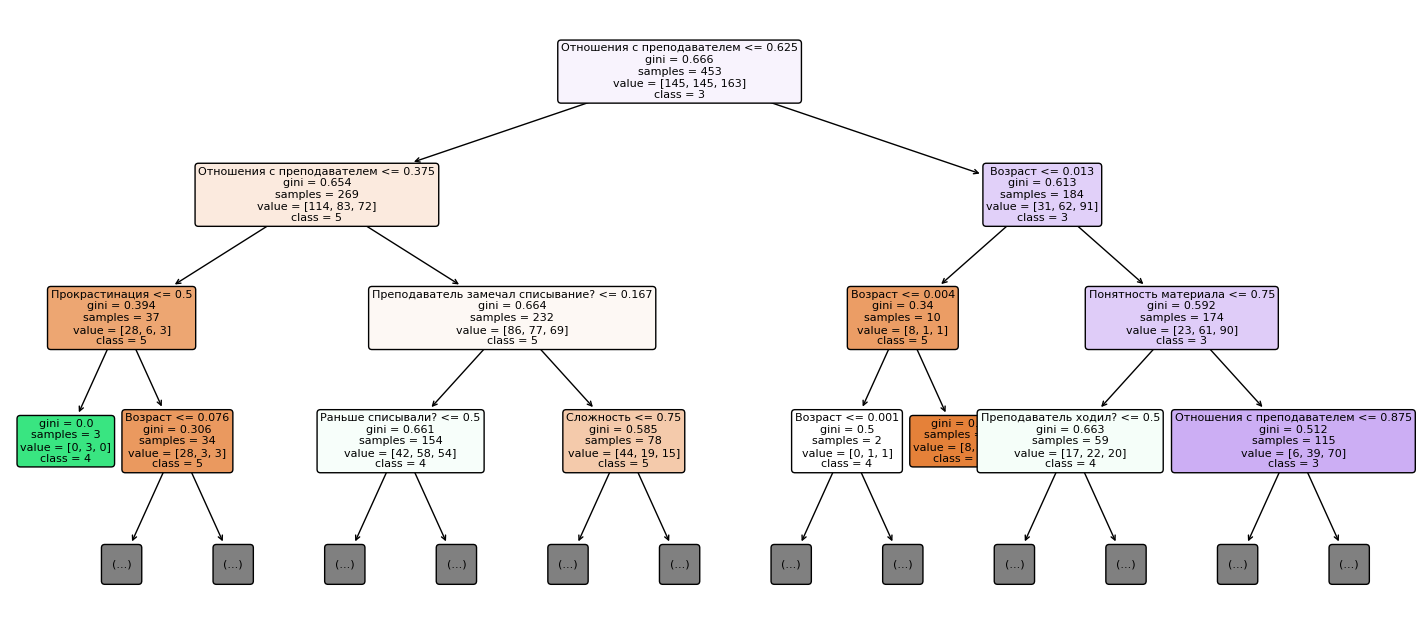

In [ ]:
### Визуализация дерева решений
plt.rcParams['figure.figsize'] = 18, 8

plot_tree(tree, feature_names=X_cols,
          class_names=['5', '4', '3', '2'], filled=True, rounded=True, fontsize=8, max_depth=3);

In [ ]:
X_select = list(map(lambda x: x[0], filter(lambda p: p[1] <= 0.5, features_gini_sorted.items())))
X_select

['Возраст',
 'Вуз',
 'Доход',
 'Польза',
 'Вы увлечены предметом?',
 'Шпаргалки',
 'Свои шпаргалки',
 'Форма экзамена',
 'Характер преподавателя',
 'Возраст преподавателя',
 'Понятность материала',
 'Преподаватель ходил?',
 'Отношения с преподавателем',
 'Пол',
 'Преподаватель увлечён предметом?',
 'Преподаватель замечал списывание?',
 'Год рождения',
 'Посещаемость',
 'Пол преподавателя',
 'Сложность',
 'Жилье',
 'Прокрастинация',
 'Раньше списывали?',
 'Внимание на лекции',
 'Месяц рождения',
 'Период подготовки',
 'Списывали?',
 'День рождения',
 'Семейное положение']

In [ ]:
### Обучим модели на выбранных факторных признаках
models_dict_select = {}

### kNN, (k_best)
models_dict_select["kNN"] = KNeighborsClassifier(n_neighbors=k_best).fit(X=df_balans.loc[train_index, X_select],
                                                                    y=df_balans.loc[train_index, y_col])
models_dict_select["kNN"] = {"model": models_dict_select["kNN"],
                             "pred": models_dict_select["kNN"].predict(df_balans.loc[test_index, X_select])}

### Логистическая регрессия
models_dict_select["Logit"] = LogisticRegression().fit(X=df_balans.loc[train_index, X_select],
                                                                    y=df_balans.loc[train_index, y_col])
models_dict_select["Logit"] = {"model": models_dict_select["Logit"],
                             "pred": models_dict_select["Logit"].predict(df_balans.loc[test_index, X_select])}

### Наивный Байес
models_dict_select["bayes"] = GaussianNB().fit(X=df_balans.loc[train_index, X_select],
                                               y=df_balans.loc[train_index, y_col])
models_dict_select["bayes"] = {"model": models_dict_select["bayes"],
                               "pred": models_dict_select["bayes"].predict(df_balans.loc[test_index, X_select])}

### Машины опорных векторов (линейное ядро)
models_dict_select["SVC"] = LinearSVC().fit(X=df_balans.loc[train_index, X_select],
                                     y=df_balans.loc[train_index, y_col])
models_dict_select["SVC"] = {"model": models_dict_select["SVC"],
                             "pred": models_dict_select["SVC"].predict(df_balans.loc[test_index, X_select])}

### Лес решений (n_best)
models_dict_select["RF"] = RandomForestClassifier(n_estimators=n_best).fit(X=df_balans.loc[train_index, X_select],
                                                                 y=df_balans.loc[train_index, y_col])
models_dict_select["RF"] = {"model": models_dict_select["RF"],
                            "pred": models_dict_select["RF"].predict(df_balans.loc[test_index, X_select])}

models_dict_select

{'kNN': {'model': KNeighborsClassifier(n_neighbors=3),
  'pred': array([3, 3, 3, 5, 4, 5, 3, 4, 5, 3, 4, 5, 5, 3, 5, 3, 5, 3, 4, 4, 3, 3,
         5, 4, 4, 3, 4, 3, 5, 5, 4, 5, 4, 4, 5, 5, 5, 3, 5, 3, 3, 5, 3, 4,
         3, 5, 4, 3, 4, 5, 3, 3, 4, 3, 3, 5, 3, 4, 3, 4, 5, 5, 4, 5, 3, 5,
         5, 5, 5, 5, 4, 3, 3, 5, 5, 5, 4, 4, 5, 3, 3, 5, 3, 5, 4, 4, 5, 4,
         5, 4, 5, 5, 4, 3, 5, 5, 3, 3, 5, 3, 5, 5, 3, 4, 3, 4, 5, 3, 5, 4,
         5, 3, 5, 4])},
 'Logit': {'model': LogisticRegression(),
  'pred': array([3, 5, 3, 5, 3, 5, 3, 5, 5, 3, 5, 4, 3, 5, 5, 3, 5, 3, 3, 3, 5, 5,
         3, 3, 3, 5, 3, 5, 5, 5, 5, 5, 3, 3, 4, 5, 5, 4, 4, 3, 5, 3, 5, 3,
         3, 5, 3, 3, 4, 5, 3, 3, 3, 3, 3, 5, 3, 5, 5, 4, 3, 5, 5, 5, 4, 3,
         5, 5, 5, 5, 3, 3, 3, 5, 4, 3, 4, 4, 5, 5, 3, 4, 3, 5, 4, 5, 5, 4,
         4, 3, 5, 5, 4, 5, 5, 4, 4, 3, 3, 5, 4, 5, 3, 3, 3, 4, 5, 4, 5, 4,
         3, 3, 5, 4])},
 'bayes': {'model': GaussianNB(),
  'pred': array([3, 5, 3, 5, 4, 5, 3, 3, 5, 3, 3, 3, 3,

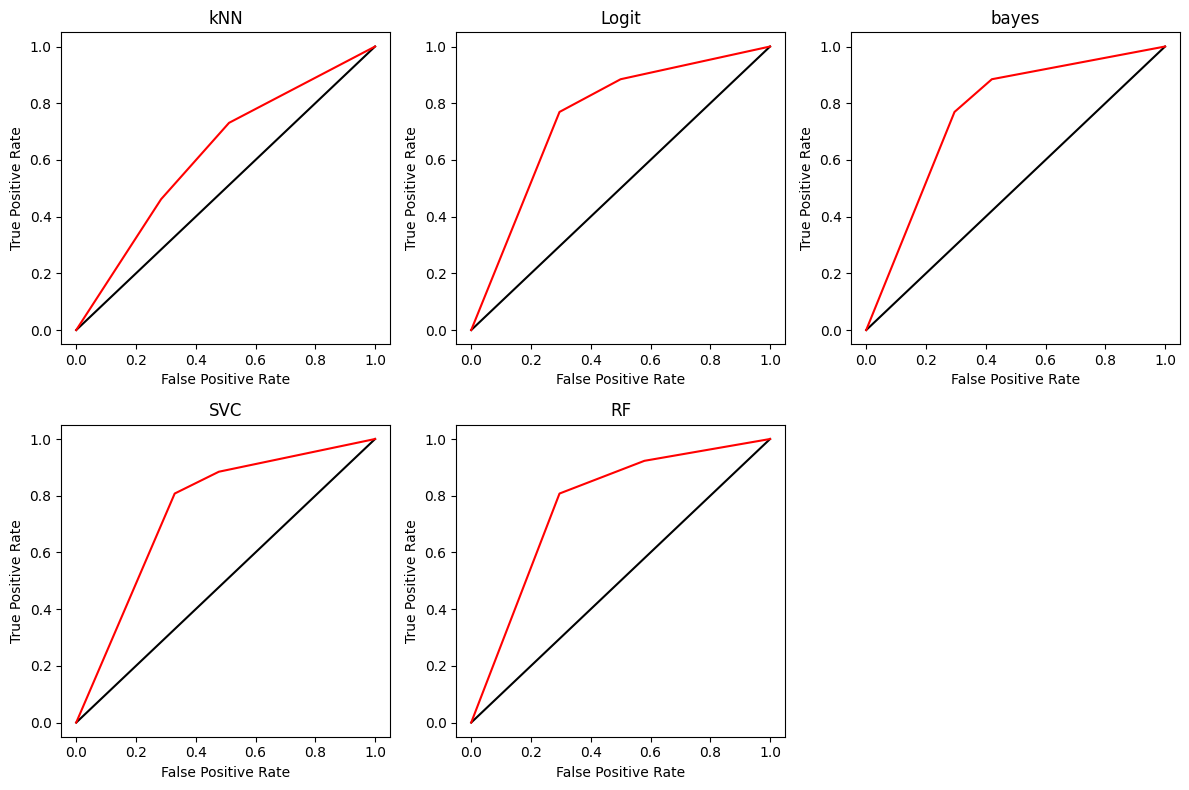

In [ ]:
### Построим ROC-кривые
plt.rcParams["figure.figsize"] = 12, 8

i = 1
for mname, mvalue in models_dict_select.items():
  plt.subplot(2, 3, i)
  fpr, tpr, tresholds = metrics.roc_curve(df_balans.loc[test_index, y_col],
                                          mvalue["pred"],
                                          pos_label=5)
  plt.plot([0, 1], [0, 1], color="black")
  plt.plot(fpr, tpr, color="red")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title(mname)
  i += 1

plt.tight_layout();

In [ ]:
### Выведем значения F-меры
i = 1
for mname, mvalue in models_dict_select.items():
  print(f"F-мера ({mname})\t= {metrics.f1_score(df_balans.loc[test_index, y_col], mvalue['pred'], average='micro'):.5f}")
  i += 1

F-мера (kNN)	= 0.47368
F-мера (Logit)	= 0.52632
F-мера (bayes)	= 0.53509
F-мера (SVC)	= 0.53509
F-мера (RF)	= 0.61404


In [ ]:
### ОТБОР ФАКТОРНЫХ ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ С ЦЕЛЕВЫМ ПРИЗНАКОМ
from scipy. stats import pearsonr, spearmanr, pointbiserialr

spearman_corrs = []
for i, col in enumerate(df_balans[X_cols].columns):
  spearman_corrs.append((col, spearmanr(df_balans[col], df_balans[y_col])))

spearman_corrs.sort(key=lambda x: abs(x[1].statistic), reverse=True)
for title, result in spearman_corrs:
  print(f'{title.ljust(33, ".")}Корреляция: r = {result.statistic:+5f};\tЗначимость: p = {result.pvalue:5f}')

Отношения с преподавателем.......Корреляция: r = +0.391991;	Значимость: p = 0.000000
Понятность материала.............Корреляция: r = +0.275241;	Значимость: p = 0.000000
Сложность........................Корреляция: r = -0.246973;	Значимость: p = 0.000000
Вы увлечены предметом?...........Корреляция: r = +0.190583;	Значимость: p = 0.000005
Характер преподавателя...........Корреляция: r = +0.183950;	Значимость: p = 0.000010
Форма экзамена...................Корреляция: r = +0.169403;	Значимость: p = 0.000050
Польза...........................Корреляция: r = +0.159157;	Значимость: p = 0.000141
Внимание на лекции...............Корреляция: r = +0.155320;	Значимость: p = 0.000205
Посещаемость.....................Корреляция: r = +0.148874;	Значимость: p = 0.000375
Преподаватель замечал списывание?Корреляция: r = -0.144905;	Значимость: p = 0.000538
Вуз..............................Корреляция: r = +0.129705;	Значимость: p = 0.001970
Пол..............................Корреляция: r = -0.121389;	Значи

In [ ]:
X_corr_select = list(map(lambda x: x[0], filter(lambda p: abs(p[1].statistic) > 0.1, spearman_corrs)))
X_corr_select

['Отношения с преподавателем',
 'Понятность материала',
 'Сложность',
 'Вы увлечены предметом?',
 'Характер преподавателя',
 'Форма экзамена',
 'Польза',
 'Внимание на лекции',
 'Посещаемость',
 'Преподаватель замечал списывание?',
 'Вуз',
 'Пол',
 'Преподаватель ходил?',
 'Шпаргалки',
 'Свои шпаргалки',
 'Возраст']

In [ ]:
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

In [ ]:
### Обучим модели на факторных признаках, выбранных по корреляции
models_dict_corr = {}

def models_fit():
  ### kNN, (k_best)
  models_dict_corr["kNN"] = KNeighborsClassifier(n_neighbors=k_best).fit(X=df_balans.loc[train_index, X_corr_select],
                                                                      y=df_balans.loc[train_index, y_col])
  models_dict_corr["kNN"] = {"model": models_dict_corr["kNN"],
                              "pred": models_dict_corr["kNN"].predict(df_balans.loc[test_index, X_corr_select])}

  ### Логистическая регрессия
  models_dict_corr["Logit"] = LogisticRegression().fit(X=df_balans.loc[train_index, X_corr_select],
                                                                      y=df_balans.loc[train_index, y_col])
  models_dict_corr["Logit"] = {"model": models_dict_corr["Logit"],
                              "pred": models_dict_corr["Logit"].predict(df_balans.loc[test_index, X_corr_select])}

  ### Наивный Байес
  models_dict_corr["bayes"] = GaussianNB().fit(X=df_balans.loc[train_index, X_corr_select],
                                                y=df_balans.loc[train_index, y_col])
  models_dict_corr["bayes"] = {"model": models_dict_corr["bayes"],
                                "pred": models_dict_corr["bayes"].predict(df_balans.loc[test_index, X_corr_select])}

  ### Машины опорных векторов (линейное ядро)
  models_dict_corr["SVC"] = LinearSVC().fit(X=df_balans.loc[train_index, X_corr_select],
                                      y=df_balans.loc[train_index, y_col])
  models_dict_corr["SVC"] = {"model": models_dict_corr["SVC"],
                              "pred": models_dict_corr["SVC"].predict(df_balans.loc[test_index, X_corr_select])}

  ### Дерево решений (depth_best)
  models_dict_corr["tree"] = DecisionTreeClassifier(max_depth=depth_best).fit(X=df_balans.loc[train_index, X_corr_select],
                                                    y=df_balans.loc[train_index, y_col])
  models_dict_corr["tree"] = {"model": models_dict_corr["tree"],
                        "pred": models_dict_corr["tree"].predict(df_balans.loc[test_index, X_corr_select])}

  ### Лес решений (n_best)
  models_dict_corr["RF"] = RandomForestClassifier(n_estimators=n_best).fit(X=df_balans.loc[train_index, X_corr_select],
                                                                  y=df_balans.loc[train_index, y_col])
  models_dict_corr["RF"] = {"model": models_dict_corr["RF"],
                              "pred": models_dict_corr["RF"].predict(df_balans.loc[test_index, X_corr_select])}

models_fit()
models_dict_corr

{'kNN': {'model': KNeighborsClassifier(n_neighbors=3),
  'pred': array([3, 4, 3, 5, 5, 5, 3, 3, 4, 5, 3, 4, 5, 4, 3, 3, 5, 3, 5, 4, 3, 3,
         3, 3, 4, 3, 3, 5, 5, 5, 4, 3, 5, 5, 3, 5, 3, 4, 4, 5, 4, 3, 5, 4,
         3, 5, 5, 4, 3, 3, 3, 4, 5, 5, 3, 5, 4, 5, 3, 4, 5, 3, 3, 3, 4, 5,
         3, 4, 4, 3, 5, 4, 3, 3, 4, 5, 3, 5, 3, 5, 5, 5, 5, 3, 4, 4, 4, 3,
         5, 3, 3, 4, 3, 3, 5, 3, 5, 5, 5, 4, 5, 3, 4, 3, 3, 5, 5, 5, 4, 4,
         3, 4, 3, 4])},
 'Logit': {'model': LogisticRegression(),
  'pred': array([3, 4, 5, 5, 5, 4, 3, 5, 4, 5, 4, 4, 5, 4, 3, 4, 4, 3, 5, 5, 3, 3,
         5, 4, 4, 3, 3, 5, 4, 5, 3, 3, 5, 5, 5, 5, 5, 4, 5, 4, 5, 4, 5, 4,
         3, 5, 4, 4, 3, 5, 4, 3, 5, 5, 3, 5, 4, 5, 3, 4, 5, 3, 4, 3, 5, 5,
         3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 3, 5, 4, 5, 5, 5, 5, 3, 3, 3, 4, 3,
         5, 4, 3, 3, 4, 4, 5, 5, 5, 5, 5, 3, 5, 3, 5, 3, 3, 5, 3, 5, 4, 5,
         4, 4, 3, 5])},
 'bayes': {'model': GaussianNB(),
  'pred': array([3, 3, 4, 5, 5, 5, 3, 5, 4, 5, 5, 3, 5,

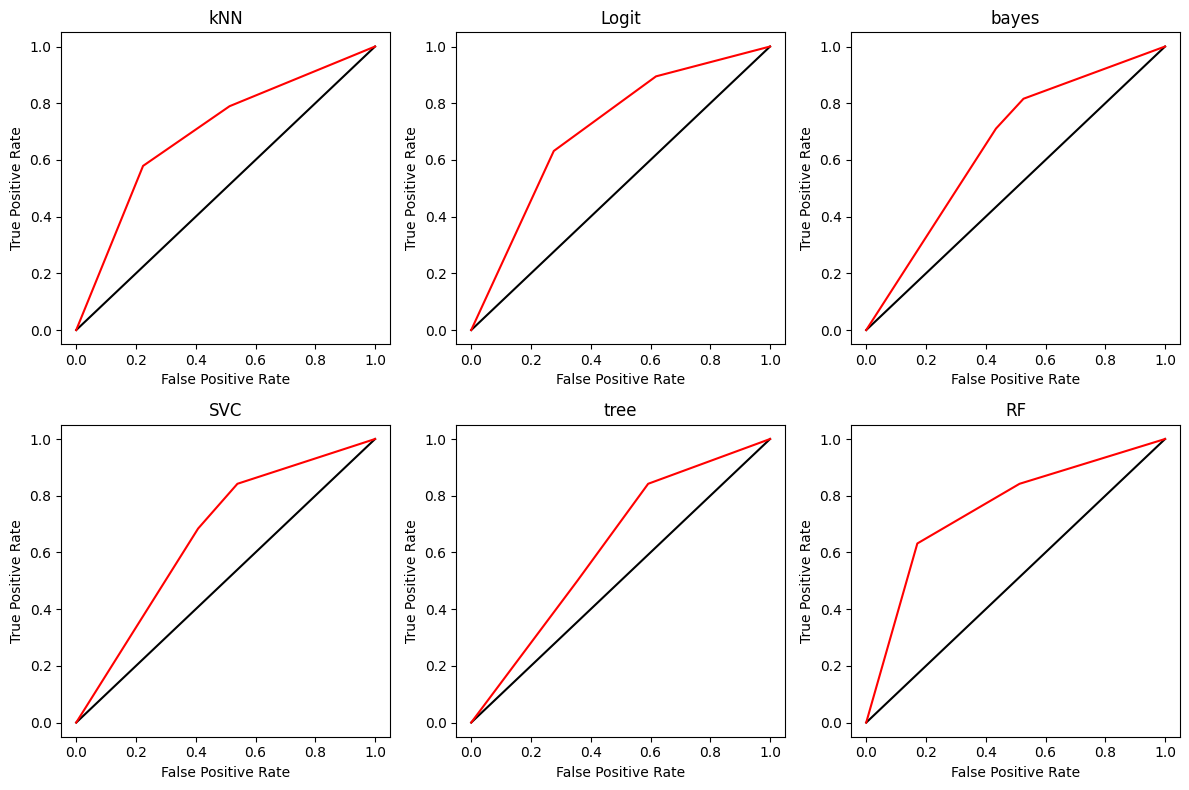

In [ ]:
### Построим ROC-кривые
i = 1
for mname, mvalue in models_dict_corr.items():
  plt.subplot(2, 3, i)
  fpr, tpr, tresholds = metrics.roc_curve(df_balans.loc[test_index, y_col],
                                          mvalue["pred"],
                                          pos_label=5)
  plt.plot([0, 1], [0, 1], color="black")
  plt.plot(fpr, tpr, color="red")
  plt.ylabel("True Positive Rate")
  plt.xlabel("False Positive Rate")
  plt.title(mname)
  i += 1

plt.tight_layout();

In [ ]:
### Выведем значения F-меры
i = 1
for mname, mvalue in models_dict_corr.items():
  print(f"F-мера ({mname})\t= {metrics.f1_score(df_balans.loc[test_index, y_col], mvalue['pred'], average='micro'):.5f}")
  i += 1

F-мера (kNN)	= 0.54386
F-мера (Logit)	= 0.54386
F-мера (bayes)	= 0.46491
F-мера (SVC)	= 0.46491
F-мера (tree)	= 0.50000
F-мера (RF)	= 0.62281


In [ ]:
### ПОДБОР ОПТИМАЛЬНОГО НАБОРА ФАКТОРНЫХ ПРИЗНАКОВ
random_index = df_balans.sample(n=len(df_balans)).index
train_index = random_index[:int(len(df_balans) * 0.8)]
test_index = random_index[int(len(df_balans) * 0.8):]

for i in range(9, 16):
    X_corr_select = list(map(lambda x: x[0], filter(lambda p: abs(p[1].statistic) > (i / 100), spearman_corrs)))
    models_fit()
    j = 1
    print(f"F-меры при |r| > {(i / 100):.2f}")
    for mname, mvalue in models_dict_corr.items():
      print(f"\tF({mname}) = {metrics.f1_score(df_balans.loc[test_index, y_col], mvalue['pred'], average='micro'):.5f}", end='')
      j += 1
    print()


F-меры при |r| > 0.09
	F(kNN) = 0.49123	F(Logit) = 0.53509	F(bayes) = 0.56140	F(SVC) = 0.57018	F(tree) = 0.48246	F(RF) = 0.67544
F-меры при |r| > 0.10
	F(kNN) = 0.50877	F(Logit) = 0.56140	F(bayes) = 0.59649	F(SVC) = 0.57018	F(tree) = 0.47368	F(RF) = 0.66667
F-меры при |r| > 0.11
	F(kNN) = 0.50000	F(Logit) = 0.55263	F(bayes) = 0.57895	F(SVC) = 0.56140	F(tree) = 0.57895	F(RF) = 0.69298
F-меры при |r| > 0.12
	F(kNN) = 0.51754	F(Logit) = 0.59649	F(bayes) = 0.60526	F(SVC) = 0.59649	F(tree) = 0.52632	F(RF) = 0.66667
F-меры при |r| > 0.13
	F(kNN) = 0.55263	F(Logit) = 0.60526	F(bayes) = 0.58772	F(SVC) = 0.55263	F(tree) = 0.56140	F(RF) = 0.71053
F-меры при |r| > 0.14
	F(kNN) = 0.55263	F(Logit) = 0.60526	F(bayes) = 0.58772	F(SVC) = 0.55263	F(tree) = 0.50877	F(RF) = 0.70175
F-меры при |r| > 0.15
	F(kNN) = 0.52632	F(Logit) = 0.50877	F(bayes) = 0.50000	F(SVC) = 0.50877	F(tree) = 0.51754	F(RF) = 0.58772


In [ ]:
X_corr_select = list(map(lambda x: x[0], filter(lambda p: abs(p[1].statistic) > 0.13, spearman_corrs)))
print(f'Оптимальный набор факторных признаков для случайного леса:')
X_corr_select

Оптимальный набор факторных признаков для случайного леса:


['Отношения с преподавателем',
 'Понятность материала',
 'Сложность',
 'Вы увлечены предметом?',
 'Характер преподавателя',
 'Форма экзамена',
 'Польза',
 'Внимание на лекции',
 'Посещаемость',
 'Преподаватель замечал списывание?']

In [ ]:
def get_f_measure(y_test, y_pred, multi=False, pos_label=None,
                               needround=False, ndigits=3):
  round0 = lambda x: round(x, ndigits) if needround else x
  average = "weighted" if multi else "binary"
  return {
      "F-measure": round0(metrics.f1_score(y_test, y_pred, average='micro',
                                           pos_label=pos_label,
                                           zero_division=0))}

In [ ]:
### КОМИТЕТ
from sklearn.ensemble import VotingClassifier

In [ ]:
ensemble_class = VotingClassifier(
    estimators=[
                # ("kNN", KNeighborsClassifier()),
                ("logit", LogisticRegression()),
                # ("nb", GaussianNB()),
                ("SVC", LinearSVC()),
                ("tree", DecisionTreeClassifier()),
                ("RF", RandomForestClassifier()),
  ],weights=(0.2, 0.2, 0.2, 0.3)).fit(X=df_balans.loc[train_index, X_corr_select], y=df_balans.loc[train_index, y_col])

y_pred = ensemble_class.predict(X=df_balans.loc[test_index, X_corr_select])
print(get_f_measure(df_balans.loc[test_index, y_col], y_pred,
                                 pos_label=1, needround=True))

{'F-measure': 0.719}


In [ ]:
### BAGGING
from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_class = BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=500,  # количество базовых моделей
    max_samples=0.8,  # объем подвыборок для обучения (кол-во/доля)
    max_features=1.0,  # объем подвыборок признаков (кол-во/доля)
    bootstrap=True,  # повторная или бесповт. выборка (бэггинг/пэстинг)
    # bootstrap_features=True,  # то же для признаков
    # oob_score=True
    random_state=3
  ).fit(X=df_balans.loc[train_index, X_corr_select], y=df_balans.loc[train_index, y_col])
y_pred = bagging_class.predict(X=df_balans.loc[test_index, X_corr_select])
print(get_f_measure(df_balans.loc[test_index, y_col], y_pred,
                                 pos_label=1, needround=True))

{'F-measure': 0.702}


In [ ]:
### STAKING
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeCV

In [ ]:
stacking_class = StackingClassifier(
    estimators=[
                ("kNN", KNeighborsClassifier()),
                ("logit", LogisticRegression()),
                ("nb", GaussianNB()),
                ("SVM", LinearSVC()),
                ("tree", DecisionTreeClassifier()),
                ("RF", RandomForestClassifier())
    ],final_estimator=LinearSVC(),
  ).fit(X=df_balans.loc[train_index, X_corr_select], y=df_balans.loc[train_index, y_col])
y_pred = stacking_class.predict(X=df_balans.loc[test_index, X_corr_select])
print(get_f_measure(df_balans.loc[test_index, y_col], y_pred,
                                 pos_label=1, needround=True))

{'F-measure': 0.702}


In [ ]:
### ГРАДИЕНТНЫЙ БУСТИНГ
from xgboost import XGBClassifier

In [ ]:
df_balans['Class'] = df_balans['Оценка']-3
df_balans.head(5)

,День рождения,Месяц рождения,Год рождения,Возраст,Пол,Вуз,Жилье,Семейное положение,Доход,Сложность,...,Форма экзамена,Характер преподавателя,Пол преподавателя,Возраст преподавателя,Преподаватель замечал списывание?,Понятность материала,Преподаватель ходил?,Отношения с преподавателем,Оценка,Class
0,0.000000,0.272727,0.996894,0.192129,0.0,0.5,0.2,0.5,0.000000,0.0,...,1.0,0.5,0.0,1.0,0.0,1.0,1.0,0.75,5,2
1,0.266667,0.545455,0.998965,0.055688,0.0,0.0,0.6,0.0,0.333333,0.5,...,0.0,1.0,0.0,0.5,1.0,0.5,1.0,0.50,3,0
2,0.266667,0.545455,0.998965,0.055688,0.0,0.0,0.6,0.0,0.333333,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,1.0,0.00,3,0
3,0.133333,0.636364,0.998965,0.053327,0.0,0.0,0.6,0.0,0.333333,0.5,...,0.0,1.0,0.0,0.5,0.0,1.0,0.0,0.75,5,2
4,0.533333,0.545455,0.999482,0.022978,0.0,0.0,0.8,0.5,0.000000,1.0,...,1.0,0.5,1.0,1.0,0.0,1.0,0.0,0.75,4,1


In [ ]:
y_col_new = df_balans.columns[-1]
df_balans[y_col_new].value_counts()

2    189
0    189
1    189
Name: Class, dtype: int64

In [ ]:
xgb_class = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, num_class=3, objective='multi:softmax'
                                ).fit(X=df_balans.loc[train_index, X_corr_select],
                                      y=df_balans.loc[train_index, y_col_new])
y_pred = xgb_class.predict(X=df_balans.loc[test_index, X_corr_select])
print(get_f_measure(df_balans.loc[test_index, y_col_new], y_pred,
                                 pos_label=1, needround=True))

{'F-measure': 0.693}
